In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs

In [51]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [52]:
X,y = make_blobs(n_samples=100, n_features=2,centers=3, random_state=23)

In [53]:
X.shape

(100, 2)

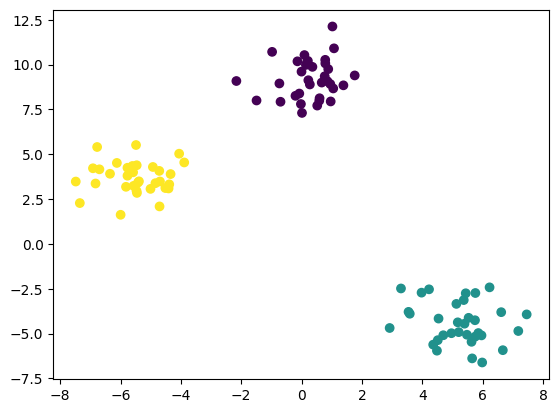

In [54]:
plt.scatter(X[:,0],X[:,1],c=y)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
#ELbow Method
from sklearn.cluster import KMeans

wcss =[]
for k in range(1,11):
    Kmeans = KMeans(n_clusters=k ,init="k-means++")
    Kmeans.fit(X_train)
    wcss.append(Kmeans.inertia_)

Text(0, 0.5, 'wcss')

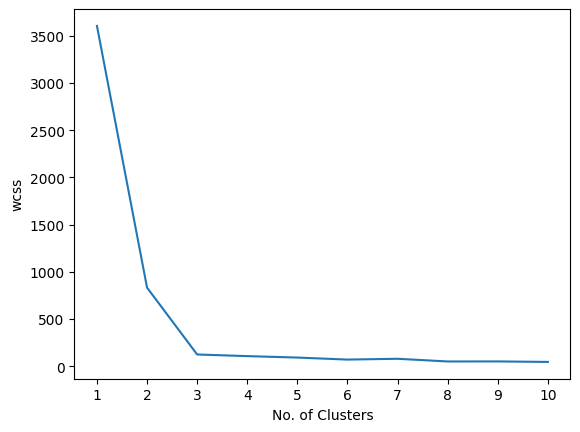

In [57]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")




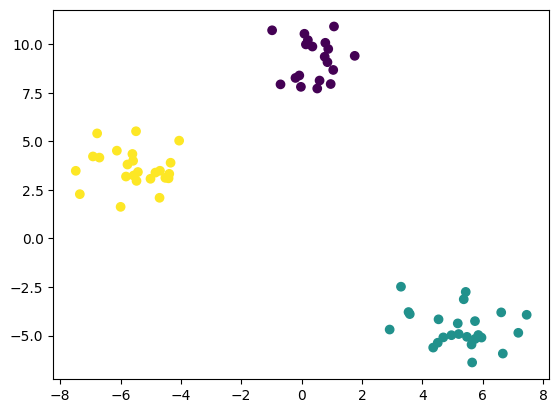

In [58]:
Kmeans = KMeans(n_clusters=3 ,init="k-means++")
y_labels = Kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [59]:
y_test = Kmeans.predict(X_test)

ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 33.

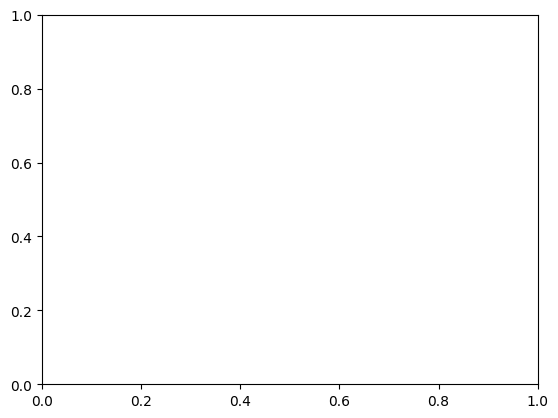

In [63]:
plt.scatter(X_test[:,0],X_test[:,1],c=y)

In [61]:
#Automatic method to find the elbow
from kneed import KneeLocater
kl = KneeLocater(range(1,11),wcss,curve = "convex",direction ="decreasing")
kl.elblow

ModuleNotFoundError: No module named 'kneed'

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

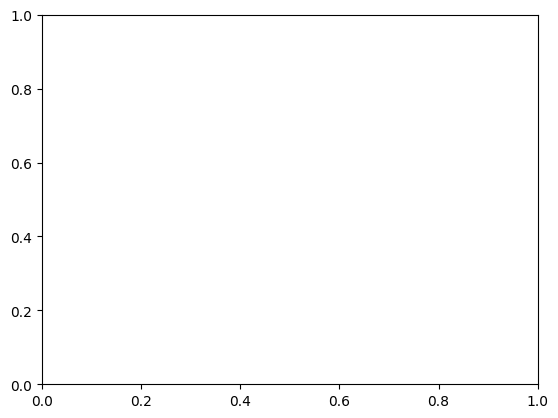

In [ ]:
#Performance MEtrix
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,11):
    Kmeans = KMeans(n_clusters=k , init="k-means++")
    Kmeans.fit(X_train)
    score = silhouette_score(X_train,Kmeans.labels_)
    silhouette_coefficients.append(score)
    plt.plot(range(2,11),silhouette_coefficients)